# Analysis of Store 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_excel('AmazingMartEU2.xlsx','ListOfOrders')
df2 = pd.read_excel('AmazingMartEU2.xlsx','OrderBreakdown')
df3 = pd.read_excel('AmazingMartEU2.xlsx','SalesTargets')

In [3]:
df1.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England
4,AZ-2011-617423,2011-01-05,Daniel Burke,Echirolles,France,Central,Home Office,2011-01-07,Priority,Auvergne-Rhône-Alpes


In [4]:
df2.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [5]:
df3.head()

,Month of Order Date,Category,Target
0,2011-01-01,Furniture,10000
1,2011-02-01,Furniture,10100
2,2011-03-01,Furniture,10300
3,2011-04-01,Furniture,10400
4,2011-05-01,Furniture,10500


# Merging 2 different sheets

In [6]:
df = pd.merge(df1,df2, on = 'Order ID', how = 'inner')

In [7]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


# Creating a New Column consisting of Year

In [8]:
df['Year'] = df['Order Date'].dt.year

In [9]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Year
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,2011
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases,2011
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art,2011
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art,2011
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage,2011


# Using GroupBy to Count Total Sales

In [10]:
total_sales = df.groupby(['Year'])['Sales'].count().reset_index(name='Sales_Per_Year')

In [11]:
total_sales

,Year,Sales_Per_Year
0,2011,1462
1,2012,1871
2,2013,2101
3,2014,2613


Text(0,0.5,'Total_Sales')

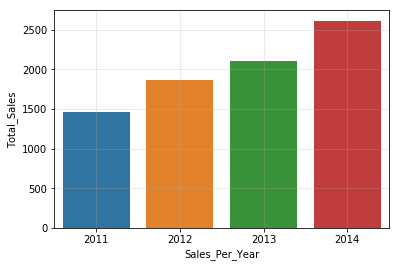

In [12]:
sns.barplot(x = total_sales['Year'], y = total_sales['Sales_Per_Year'], data = total_sales)
plt.grid(alpha = 0.3)
plt.xlabel('Sales_Per_Year')
plt.ylabel('Total_Sales')

# Using GroupBy to Count Total Profit

In [13]:
total_profit = df.groupby(['Year'])['Profit'].sum().reset_index(name='Profit_Per_Year')

In [14]:
total_profit

,Year,Profit_Per_Year
0,2011,54487
1,2012,66223
2,2013,77200
3,2014,85330


Text(0,0.5,'Total_Profit')

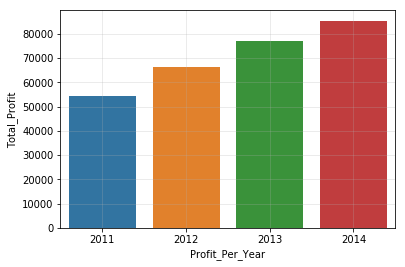

In [15]:
sns.barplot(x = total_profit['Year'], y = total_profit['Profit_Per_Year'], data = total_profit)
plt.grid(alpha = 0.3)
plt.xlabel('Profit_Per_Year')
plt.ylabel('Total_Profit')

# Comparing Total Profit and Sales 

Text(0,0.5,'Total_Profit')

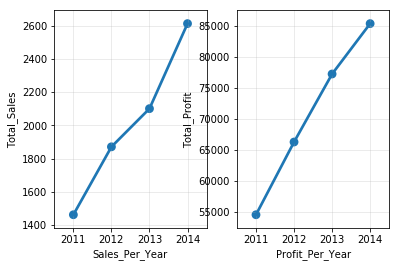

In [16]:
plt.figure()

plt.subplot(1,2,1)
sns.pointplot(x = total_sales['Year'], y = total_sales['Sales_Per_Year'], data = total_sales)
plt.grid(alpha = 0.3)
plt.xlabel('Sales_Per_Year')
plt.ylabel('Total_Sales')

plt.subplot(1,2,2)
sns.pointplot(x = total_profit['Year'], y = total_profit['Profit_Per_Year'], data = total_profit)
plt.grid(alpha = 0.3)
plt.xlabel('Profit_Per_Year')
plt.ylabel('Total_Profit')

# Comparing Average Profit and Sales 

Text(0,0.5,'Avg_Profit')

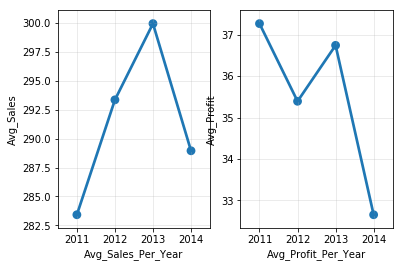

In [17]:
plt.figure()

plt.subplot(1,2,1)
avg_sales = df.groupby(['Year'])['Sales'].mean().reset_index(name='Avg_Sales_Per_Year')
sns.pointplot(x = avg_sales['Year'], y = avg_sales['Avg_Sales_Per_Year'], data = avg_sales)
plt.grid(alpha = 0.3)
plt.xlabel('Avg_Sales_Per_Year')
plt.ylabel('Avg_Sales') 

plt.subplot(1,2,2)
avg_profit = df.groupby(['Year'])['Profit'].mean().reset_index(name='Avg_Profit_Per_Year')
sns.pointplot(x = avg_profit['Year'], y = avg_profit['Avg_Profit_Per_Year'], data = avg_profit)
plt.grid(alpha = 0.3)
plt.xlabel('Avg_Profit_Per_Year')
plt.ylabel('Avg_Profit')

In [18]:
annual_report = total_sales.merge(total_profit.merge(avg_profit))

In [19]:
annual_report

,Year,Sales_Per_Year,Profit_Per_Year,Avg_Profit_Per_Year
0,2011,1462,54487,37.268810
1,2012,1871,66223,35.394441
2,2013,2101,77200,36.744407
3,2014,2613,85330,32.655951


# Obtaining Insights with more Granularity

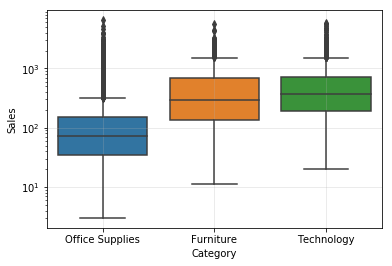

In [20]:
sns.boxplot(x = 'Category', y = 'Sales', data = df)
plt.yscale('log')
plt.grid(alpha = 0.3)

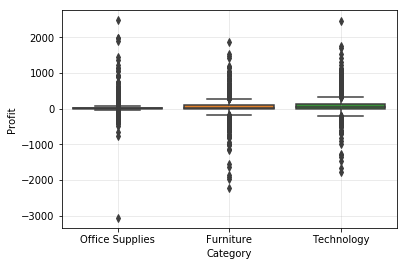

In [21]:
sns.boxplot(x = 'Category', y = 'Profit', data = df)
plt.grid(alpha = 0.3)

# Removing Outliers In Profit Data

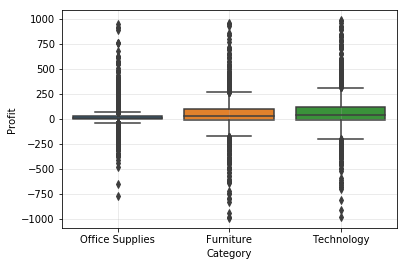

In [22]:
df = df[(df['Profit']<1000) & (df['Profit']>-1000)]
sns.boxplot(x = 'Category', y = 'Profit', data = df)
plt.grid(alpha = 0.3)

# Analyzing Category 

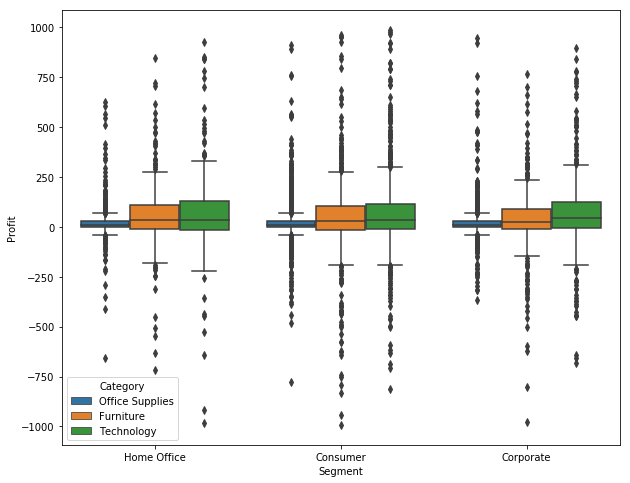

In [23]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Segment', y = 'Profit', hue= 'Category', data = df)

# Analyzing data with Bar Plot

C:\Users\Maltesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


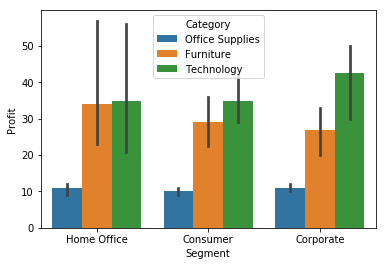

In [24]:
sns.barplot(x = 'Segment', y = 'Profit' , hue = 'Category' , data = df, estimator = np.median)

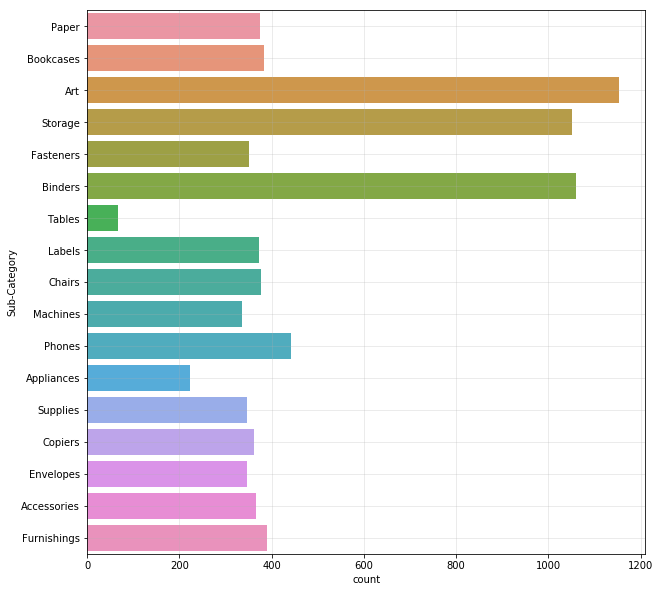

In [25]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Sub-Category', data = df)
plt.grid(alpha = 0.3)

C:\Users\Maltesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


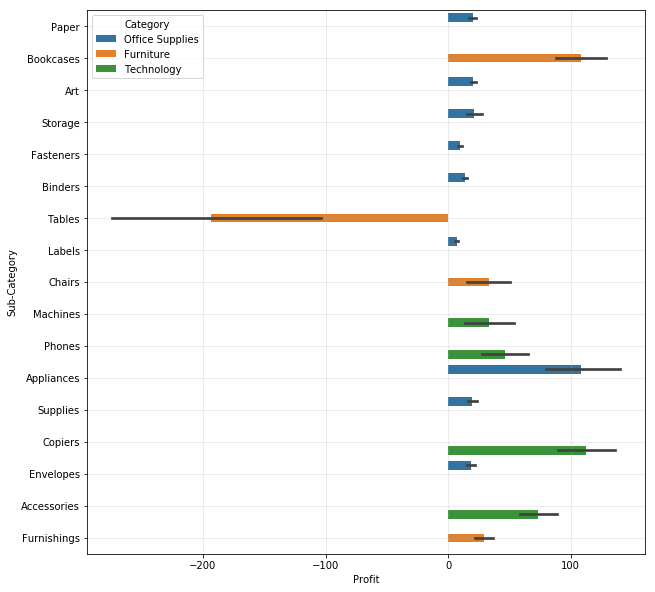

In [26]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'Profit', y = 'Sub-Category', hue = 'Category', data = df)
plt.grid(alpha = 0.3)

### 'Tables' under Furniture category running under HEAVY LOSS <br /><br />  'Art, Storage, Blinders' under Office Supplies category are BEST SELLING with LESS PROFIT<br /><br /> 'Appliences' under Office Supplies are SECOND LEAST SELLING but with HIGH PROFIT return<br /><br /> 'Copiers' under Technology are GREAT PERFORMERS

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 8046
Data columns (total 18 columns):
Order ID         7996 non-null object
Order Date       7996 non-null datetime64[ns]
Customer Name    7996 non-null object
City             7996 non-null object
Country          7996 non-null object
Region           7996 non-null object
Segment          7996 non-null object
Ship Date        7996 non-null datetime64[ns]
Ship Mode        7996 non-null object
State            7996 non-null object
Product Name     7996 non-null object
Discount         7996 non-null float64
Sales            7996 non-null int64
Profit           7996 non-null int64
Quantity         7996 non-null int64
Category         7996 non-null object
Sub-Category     7996 non-null object
Year             7996 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(11)
memory usage: 1.5+ MB


In [28]:
time_sales = df.groupby('Order Date')['Sales'].sum()
time_profit = df.groupby('Order Date')['Profit'].sum()

In [29]:
time_sales.head()

Order Date
2011-01-01     45
2011-01-03    854
2011-01-04    184
2011-01-05    297
2011-01-07    904
Name: Sales, dtype: int64

In [30]:
time_profit.head()

Order Date
2011-01-01    -26
2011-01-03    290
2011-01-04     -2
2011-01-05     98
2011-01-07    181
Name: Profit, dtype: int64

C:\Users\Maltesh\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\Maltesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


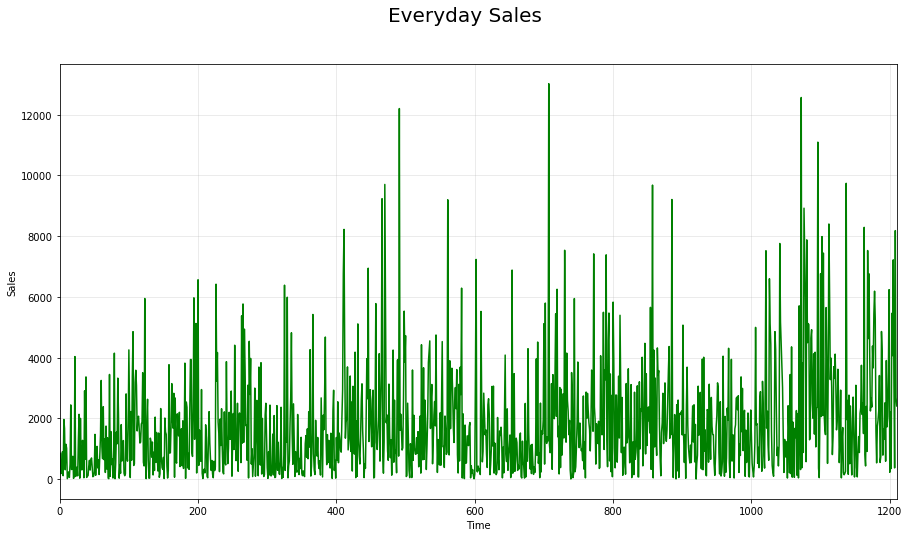

In [34]:
fig = plt.figure(figsize = (15,8))
sns.tsplot(data = time_sales, color = 'green')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(alpha = 0.3)
fig.suptitle('Everyday Sales', fontsize=20) 
plt.show()

C:\Users\Maltesh\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\Maltesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


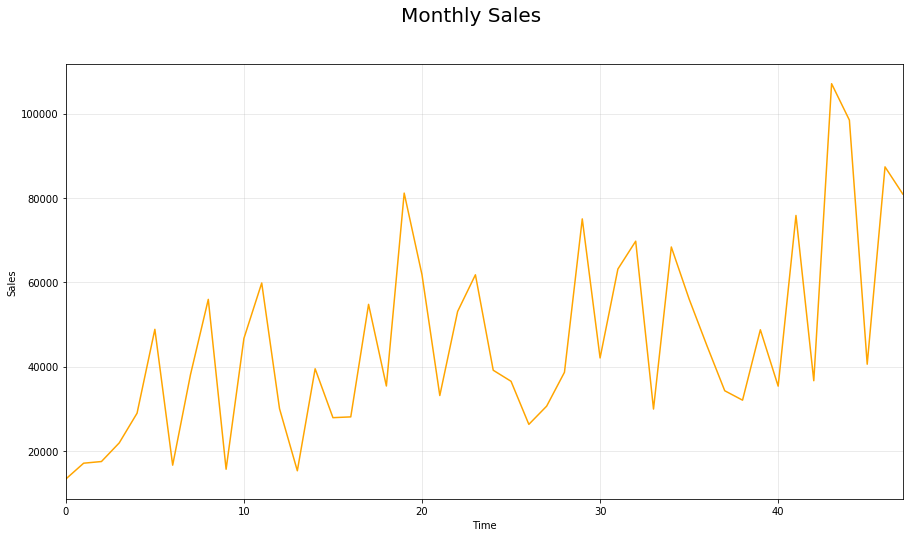

In [35]:
df['Month'] = df['Order Date'].dt.month
time_sales_ym = df.groupby(['Year','Month'])['Sales'].sum()
fig = plt.figure(figsize = (15,8))
sns.tsplot(data = time_sales_ym, color = 'orange')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(alpha = 0.3)
fig.suptitle('Monthly Sales', fontsize=20)
plt.show()

# Pivoting Data using Month 

In [37]:
year_month = pd.pivot_table(df, values = 'Sales', index = 'Year', columns = 'Month', aggfunc = 'mean')
year_month.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,205.353846,219.256410,208.297619,251.954023,304.789474,277.482955,248.283582,222.760234,304.010870,217.638889,276.195266,291.804878
2012,297.247525,228.417910,265.013423,293.631579,278.009901,289.735450,270.236641,292.895307,301.351220,273.900826,242.315068,299.849515
2013,303.403101,270.511111,245.841121,319.031250,295.068702,291.883268,368.921053,206.963934,259.226766,305.489796,298.506550,264.240566
2014,256.920000,231.594595,269.277311,310.401274,243.917241,317.288703,261.814286,284.757979,318.533981,266.888158,270.436533,255.205047


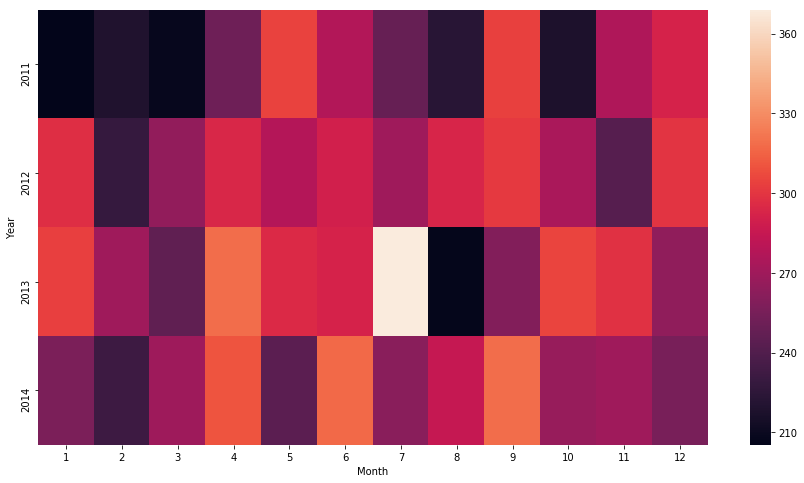

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(year_month)